In [1]:
import pennylane.numpy as np
import pennylane as qml
from sklearn.svm import SVC
import sklearn.decomposition as skd
from scipy.io import loadmat
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from kernel_pca import *

In [5]:
kernel.print_square_kernel_matrix(train_data)

[[1.    0.936 0.022 0.024 0.016 0.794 0.022 0.052 0.047 0.033]
 [0.936 1.    0.021 0.028 0.013 0.89  0.021 0.061 0.057 0.038]
 [0.022 0.021 1.    0.858 0.932 0.019 0.002 0.038 0.024 0.575]
 [0.024 0.028 0.858 1.    0.725 0.044 0.005 0.062 0.019 0.327]
 [0.016 0.013 0.932 0.725 1.    0.009 0.001 0.032 0.014 0.484]
 [0.794 0.89  0.019 0.044 0.009 1.    0.015 0.062 0.047 0.043]
 [0.022 0.021 0.002 0.005 0.001 0.015 1.    0.011 0.07  0.008]
 [0.052 0.061 0.038 0.062 0.032 0.062 0.011 1.    0.006 0.019]
 [0.047 0.057 0.024 0.019 0.014 0.047 0.07  0.006 1.    0.054]
 [0.033 0.038 0.575 0.327 0.484 0.043 0.008 0.019 0.054 1.   ]]


In [1]:
from kernel_pca import *

dataset = Dataset(truncate=10)
kernel = Kernel(num_layers=6, num_wires=5)
classifier = Classifier(kernel, dataset)
classifier.train(report=False)
# train(features=train_data, labels=train_labels, Kernel=kernel, num_layers=6, report=True)
classifier.evaluate_kernel_target_alignment()

SVM trained in 2.916 seconds
SVM inference in 2.971 seconds
The accuracy of the kernel with random parameters is 0.900
The target alignment of the kernel with random parameters is 0.216
Target alignment of the kernel with random parameters in 1.674 seconds


In [3]:
from kernel_pca import *

dataset = Dataset(truncate=10)
kernel = Kernel(num_layers=6, num_wires=5)
classifier = Classifier(kernel, dataset)
classifier.train(report=False)
# train(features=train_data, labels=train_labels, Kernel=kernel, num_layers=6, report=True)
classifier.evaluate_kernel_target_alignment()
# classifier.train_target_alignment()

[-1  1 -1 -1 -1]
Parameter initialized
SVM trained in 0.273 seconds
SVM inference in 0.367 seconds
The accuracy of the kernel with random parameters is 0.800
The target alignment of the kernel with random parameters is 0.269
Target alignment of the kernel with random parameters in 0.151 seconds
Subset selection in 0.000 seconds
Cost function definition in 0.000 seconds
(6, 2, 5)
Optimization step in 14.764 seconds
Subset selection in 0.000 seconds
Cost function definition in 0.000 seconds
(6, 2, 5)
Optimization step in 14.883 seconds
Subset selection in 0.000 seconds
Cost function definition in 0.000 seconds
(6, 2, 5)


In [1]:
from kernel_pca import *
train_data = {'samples': [], 'train': [], 'predict': [], 'accuracy': []}
for i in range(10, 100, 10):
    dataset = Dataset(truncate=i)
    kernel = Kernel(num_layers=6, num_wires=5)
    classifier = Classifier(kernel, dataset)
    report = classifier.train(report=False)
    train_data['samples'].append(report['samples'])
    train_data['train'].append(report['train'])
    train_data['predict'].append(report['predict'])
    train_data['accuracy'].append(report['accuracy'])


SVM trained in 1.038 seconds
SVM inference in 0.996 seconds
The accuracy of the kernel with random parameters is 0.900
SVM trained in 4.169 seconds


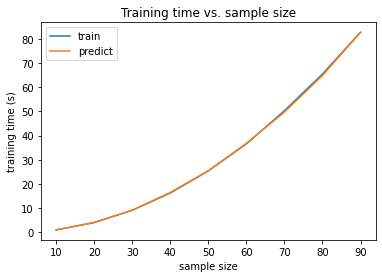

In [6]:
# plot results 
import matplotlib.pyplot as plt
plt.plot(train_data['samples'], train_data['train'], label='train')
plt.plot(train_data['samples'], train_data['predict'], label='predict')
plt.title('Training time vs. sample size')
plt.xlabel('sample size')
plt.ylabel('training time (s)')

plt.legend()
plt.show()

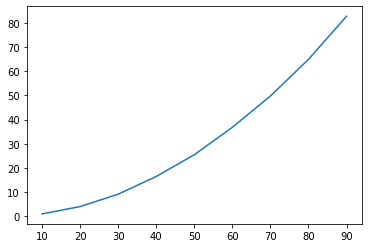

In [5]:
plt.plot(train_data['samples'], train_data['accuracy'], label='accuracy')
plt.show()

In [6]:
arr1 = np.array([[1,2,3], [1,2,3], [1,2,3]])
arr2 = np.array([[1,2,3], [1,2,3], [1,2,3]])
print(arr1)

print(np.dot(arr1, arr2.T))

[[1 2 3]
 [1 2 3]
 [1 2 3]]
[[14 14 14]
 [14 14 14]
 [14 14 14]]


In [6]:
labels = np.array([0,2,0,0])
labels[labels==0] = -1
labels[labels>0] = 1

In [12]:
# Drop out 0 labels for training
train_data = dataset.train_data[dataset.train_labels != 0]
train_labels = dataset.train_labels[dataset.train_labels != 0]

test_data = dataset.test_data[dataset.test_labels != 0]
test_labels = dataset.test_labels[dataset.test_labels != 0]


In [2]:
import pennylane.numpy as np
import pennylane as qml
from sklearn.svm import SVC
import sklearn.decomposition as skd
from kernel_pca import *

dataset = Dataset(truncate=10, binary=False)
kernel = Kernel(num_layers=6, num_wires=5)
kernel_matrix = kernel.get_square_kernel_matrix(train_data)
model = SVC(kernel='precomputed')
model.fit(kernel_matrix, train_labels)

kernel_matrix_test = kernel.get_square_kernel_matrix(dataset.test_data)
predictions = model.predict(kernel_matrix_test)
accuracy_init = 1 - np.count_nonzero(predictions - dataset.test_labels) / len(dataset.test_labels)
print(accuracy_init)

0.8


In [2]:
from kernel_pca import *

dataset = Dataset(truncate=1000, binary=False)
#Classical implementaiton
kernel_matrix_train = np.dot(train_data, train_data.T)
model = SVC(kernel='precomputed')
model.fit(kernel_matrix_train, train_labels)
predictions = model.predict(kernel_matrix_train)
accuracy_init = 1 - np.count_nonzero(predictions - train_labels) / len(train_labels)
print(classification_report(train_labels, predictions))
print(accuracy_init)

test_data = test_data
test_labels = test_labels

kernel_matrix_test = np.dot(test_data, train_data.T)
predictions = model.predict(kernel_matrix_test)
# classification_report(dataset.test_labels, predictions)
accuracy_init = 1 - np.count_nonzero(predictions - test_labels) / len(test_labels)
print(accuracy_init)

NameError: name 'train_data' is not defined

In [7]:
print(dataset.train_labels)

[0 2 0 0 0 0 0 0 0 0 3 0 0 2 0 1 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 3 0 0 0 8
 4 0 0 0 0 0 0 0 0 0 0 0 0 0 7 0 0 0 0 2 0 2 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0
 0 3 0 4 2 0 1 0 0 0 0 0 8 0 0 0 2 0 2 0 0 4 0 0 0 0 2 4 0 0 0 0 0 0 0 0 0
 0 0 2 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0
 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 2 0 2 0 2 0 0 3 0 0 0 0 2 1 0 8 0 8
 0 0 2 0 0 0 6 0 0 0 0 5 0 0 0 0 0 8 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0
 0 8 0 0 0 0 3 0 0 0 0 1 2 0 0 0 0 2 0 0 0 0 9 8 0 0 0 7 0 1 2 0 8 0 0 0 0
 0 0 0 0 0 0 0 0 2 0 0 0 6 0 0 6 0 0 0 0 2 0 0 0 0 0 0 0 0 0 8 1 0 0 8 0 0
 0 0 0 0 0 0 0 0 0 2 2 2 0 0 0 0 3 0 0 0 0 0 2 6 2 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 2 0 1 6 0 2 1 0 0 0 0 0 4 0 0 2 0 2 0 0 0 2 0 1 3 0 0 2 0
 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 5 0 0 1 0 7 0 0 0 0 0 0 0 0 0 4 0
 0 0 0 0 0 6 0 0 0 9 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 6 0 0 6 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 6 0 9 0 2 0 0 0 5
 0 2 0 1 0 2 0 0 0 0 0 2 